In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


here


In [11]:
# develop a global transfare matrix
def f(x,y):
        difference = x-y
        square = difference**2
        negate = -square
        return  0.1*np.exp(negate/2)
def matrix():
        v = np.linspace(0,10,50)
        w = np.linspace(0,10,50)

        matrix=np.ones((len(v),len(w)))
        for i in range(len(v)):
            for j in range(len(w)): 
                    matrix[i][j]=f(w[j],v[i])
        return matrix
tranfareMatrix = matrix()
print('here')

here


In [12]:
#find the constant of normalizing matrix (Pij/Pj)
W=2
P=np.matmul([W]*len(tranfareMatrix),tranfareMatrix)
con=np.divide(W*tranfareMatrix,P)
print('here')

here


In [19]:
# Find the measured results (fj)   
x=np.linspace(0,10,50)#defining the x-axis
def find_fj():
    def f(x):
        return (np.exp(-x**2))
    y = np.zeros(len(x))
    for i in range(len(x)):
            y[i]=(f(x[i]))
    f=np.matmul(tranfareMatrix,y)
    return f

measured_results = find_fj()
noisy=measured_results.copy()
print(noisy)

[4.04564615e-01 4.31101487e-01 4.43259240e-01 4.39954993e-01
 4.21720418e-01 3.90578055e-01 3.49674993e-01 3.02764971e-01
 2.53655272e-01 2.05727410e-01 1.61607185e-01 1.23014022e-01
 9.07761343e-02 6.49680200e-02 4.51143007e-02 3.04072758e-02
 1.98992397e-02 1.26480140e-02 7.80998502e-03 4.68618444e-03
 2.73283899e-03 1.54918868e-03 8.53783108e-04 4.57498737e-04
 2.38378880e-04 1.20784015e-04 5.95163836e-05 2.85210270e-05
 1.32925180e-05 6.02519990e-06 2.65621925e-06 1.13890880e-06
 4.74951777e-07 1.92640519e-07 7.59949374e-08 2.91582507e-08
 1.08812458e-08 3.94944887e-09 1.39423285e-09 4.78712988e-10
 1.59866062e-10 5.19252462e-11 1.64037107e-11 5.04018994e-12
 1.50623586e-12 4.37804624e-13 1.23768176e-13 3.40313302e-14
 9.10102163e-15 2.36724199e-15]


In [20]:
#distorting measured results
for i in range(len(noisy)):
    if (noisy[i]>0.2):
        #max function to discard negative values in the noisy
        noisy[i]= max(0,np.random.normal(noisy[i],0.02*np.sqrt(noisy[i]))) 
        

In [21]:
def ff(x):
    return (np.exp(-x**2))
y = np.zeros(len(x))
for i in range(len(x)):
        y[i]=(ff(x[i]))
original=y

In [22]:
#Find working fj:
def working_fj(transfareMatrix,result):
    return np.matmul(tranfareMatrix,result)

result=np.ones(len(tranfareMatrix))
fnj=working_fj(tranfareMatrix,result)

In [23]:
def Regular(recovered):
    c=1 #current
    p=c-1 #past
    f=c+1 #future
    Wrt=0.02 #rationalizing "weight"
    for i in range(len(recovered)-1):
        if ((recovered[p]>recovered[c]) and (recovered[c]<recovered[f])):
            recovered[c]=(recovered[c]/(1-Wrt))
        elif ((recovered[c]>recovered[p]) and (recovered[c]>recovered[f])):###change after and  recovered[p] torecovered[f]###
            recovered[c]=(recovered[c]/(1+Wrt))
        else:
            recovered[c]=recovered[c]
        c+=1
        p=c-1
        f=c+1
        if f==len(recovered):
            break
    return recovered

In [24]:
def Recover(actual,measured,varying,k):
    var = np.divide(measured,varying)
    prem_res = np.matmul(var,k)
    final_result= prem_res*actual
    return final_result


In [25]:
rec =np.ones(len(x))
n=0
while (n<500):
    fnj=working_fj(tranfareMatrix,rec)
    rec=Recover(rec,noisy,fnj,con)
    rec=Regular(rec)
    n+=1
recovered=rec.copy()

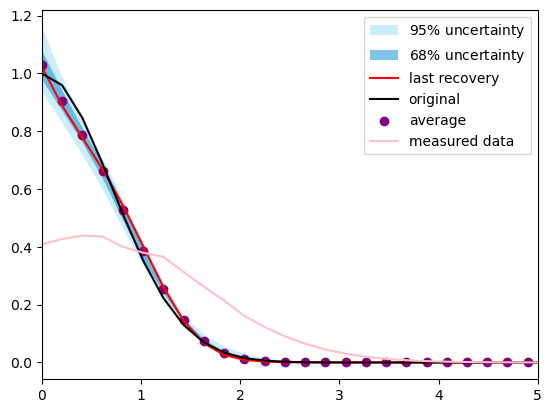

In [26]:
band=[]
sample=[]
average=[]
n=0
rec =np.ones(len(x))
numberOfGenerations=500
noise=noisy.copy()
#creating an error band

while(n<numberOfGenerations):
        fnj=working_fj(tranfareMatrix,rec)
        rec=Recover(rec,noise,fnj,con)
        rec=Regular(rec)
        band.append(rec)
        #changing the next input round
        noise=np.random.normal(noisy,0.1*noise) # It is important to keep this positive
        #print(noisy)
        n+=1
        
#finding the average for all the points
j=0
for i in range(len(x)):
    j=0
    sample=[]  #
    while(j<numberOfGenerations):
            sample.append(band[j][i])
            j+=1
    average.append(np.mean(sample))
                
#finding the standard deviation from the mean
mean=np.array([np.mean(np.array(band)[:,ji]) for ji in range(len(x))])
Deviation=np.array([np.std(np.array(band)[:,ji]) for ji in range(len(x))])
### visualization inside band, but you can comment it see the bands
# plt.figure()
# for j in range(500):
#        plt.plot(x,band[j])
#        plt.plot(x,mean+2*Deviation,'.')

bounds = np.percentile(np.array(band), 100 * norm.cdf([-2, -1, 1, 2]), axis=0)
plt.fill_between(x, 1*bounds[0, :], 1*bounds[-1, :], 
                   label="95$\%$ uncertainty", fc="#03A9F4", alpha=0.2)
plt.fill_between(x,1*bounds[1, :], 1*bounds[-2, :], 
                       label="68$\%$ uncertainty", fc="#0288D1", alpha=0.5)

plt.plot(x,recovered, color='red',label="last recovery") #to show the effect of noise amplification
plt.plot(x,original, color ='black',label="original")
plt.scatter(x,average, color='purple', label="average")
plt.xlim(0,5)
plt.plot(x,noisy,color="pink",label="measured data")
plt.legend()
plt.show()

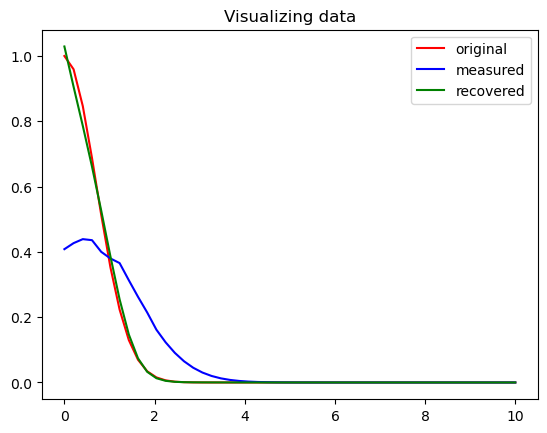

In [28]:
    plt.plot(x,original,"red",label="original")
    plt.plot(x,noisy,"blue",label="measured")
    plt.plot(x,average,"green",label="recovered")
    plt.title("Visualizing data")
    plt.legend()
    plt.show()